1. Use K-Means Machine Learning Model and classify the employees into various income groups or clusters

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/UNSUPERVISED_LEARNING/K_MEANS_CLUSTERING/Data/income.csv')

In [3]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


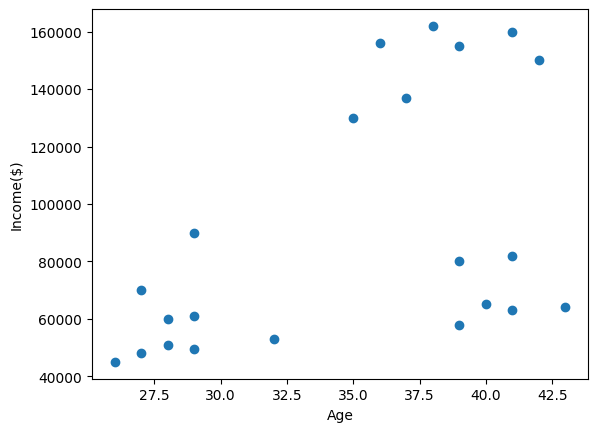

In [6]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [9]:
df['Cluster'] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [10]:
print(km.cluster_centers_)

[[3.40000000e+01 8.05000000e+04]
 [3.82857143e+01 1.50000000e+05]
 [3.29090909e+01 5.61363636e+04]]


In [11]:
X = km.cluster_centers_[:,0] # all rows in 0th column
Y = km.cluster_centers_[:,1] # all rows in 1st column

In [12]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

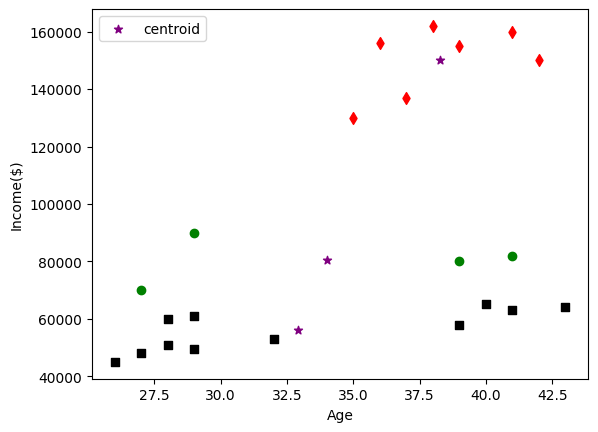

In [16]:
# Scatter plot the cluster
plt.scatter(df1.Age,df1['Income($)'],color = 'green',marker='o')
plt.scatter(df2.Age,df2['Income($)'],color = 'red',marker='d')
plt.scatter(df3.Age,df3['Income($)'],color = 'black',marker='s')
# Scatter plot the cluster centers also
plt.scatter(X,Y,color = 'purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

- We can  understand that the data points are not classified properly.
- The points are not close enough and the distance between the centers to the points is a bit far.
- Why the data points are not classified properly? 
    - The reason is that the data contains non-uniform values.
    - For example Age and Income columns may contain too big or too small values that cannot be fit into proper scale.
    - Use Min Max Scaler

# Min Max Scaler:
- It scales the data points between 0 and 1.

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [21]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),Cluster,cluster
0,Rob,0.058824,0.213675,0,2
1,Michael,0.176471,0.384615,0,2
2,Mohan,0.176471,0.136752,2,2
3,Ismail,0.117647,0.128205,2,2
4,Kory,0.941176,0.897436,1,1


In [22]:
X = km.cluster_centers_[:,0] # all rows in 0th column
Y = km.cluster_centers_[:,1] # all rows in 1st column

In [25]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

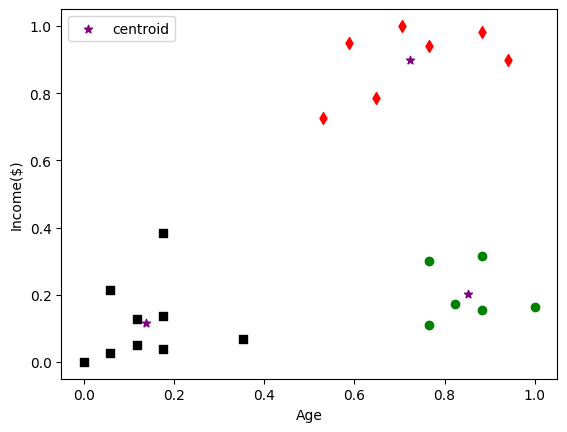

In [33]:
# Scatter plot the cluster
plt.scatter(df1.Age,df1['Income($)'],color = 'green',marker='o')
plt.scatter(df2.Age,df2['Income($)'],color = 'red',marker='d')
plt.scatter(df3.Age,df3['Income($)'],color = 'black',marker='s')
# Scatter plot the cluster centers also
plt.scatter(X,Y,color = 'purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

# ELBOW PLOT

In [31]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

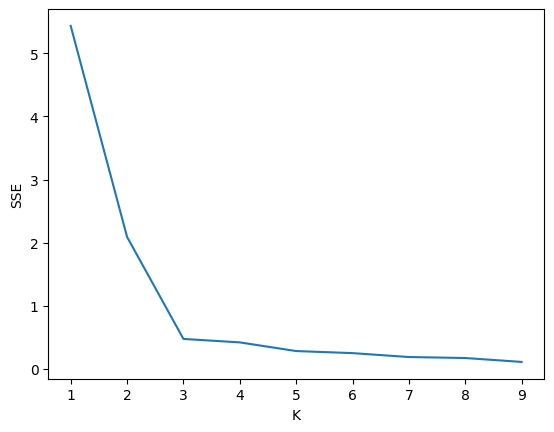

In [32]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)
plt.show()